In [1]:
from modules import * 
from modules.utils import *

In [2]:
X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data(
    filename='Loan_Default_Cleaned.csv',
    target_column='Status'
)

In [3]:
def train_decision_tree(X_train, y_train, X_test, y_test, handle_imbalance=None):
    
    if handle_imbalance == 'balanced':
        model = DecisionTreeClassifier(class_weight='balanced')
        imbalance_label = "Class Weights"
        print("Using balanced class weights for Decision Tree.")
    
    elif handle_imbalance == 'smote':
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        model = DecisionTreeClassifier()
        X_train, y_train = X_train_resampled, y_train_resampled
        imbalance_label = "SMOTE"
        print("Using SMOTE for class imbalance in Decision Tree.")
    
    else:
        model = DecisionTreeClassifier()
        imbalance_label = "No Weights"
        print("Training Decision Tree without handling class imbalance.")
    
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    
    
    plot_confusion_matrix(y_test, y_pred,y_probs, model_name=f'Decision Tree ({imbalance_label})')
    if y_probs is not None:
        plot_roc_curve(y_test, y_probs, model_name=f'Decision Tree ({imbalance_label})')
    
    return model, y_pred, y_probs

Training Decision Tree without handling class imbalance.


<Figure size 640x480 with 0 Axes>

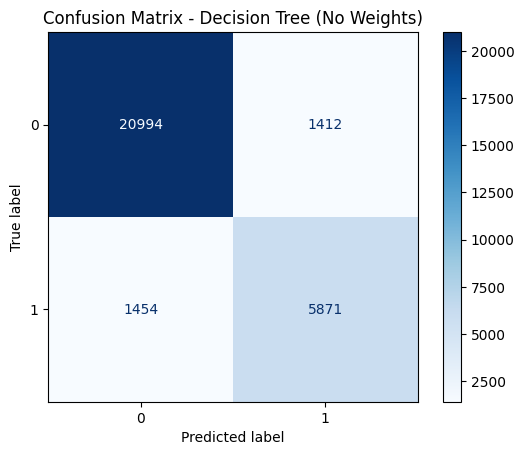

Decision Tree (No Weights) Metrics:
Accuracy: 0.9036
Precision: 0.8061
Recall: 0.8015
F1 Score: 0.8038
ROC-AUC Score: 0.8692


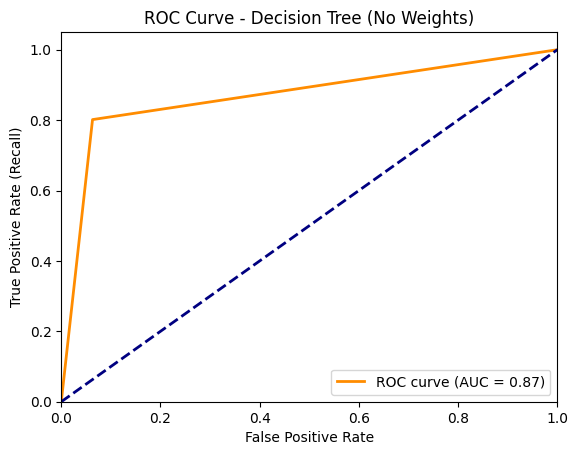

Decision Tree (No Weights) ROC-AUC Score: 0.87
Using balanced class weights for Decision Tree.


<Figure size 640x480 with 0 Axes>

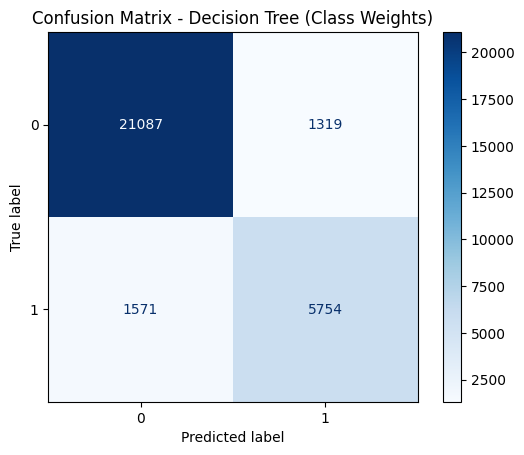

Decision Tree (Class Weights) Metrics:
Accuracy: 0.9028
Precision: 0.8135
Recall: 0.7855
F1 Score: 0.7993
ROC-AUC Score: 0.8633


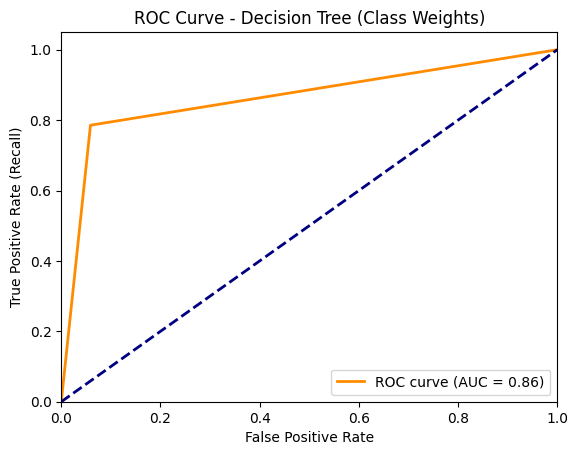

Decision Tree (Class Weights) ROC-AUC Score: 0.86
Using SMOTE for class imbalance in Decision Tree.


<Figure size 640x480 with 0 Axes>

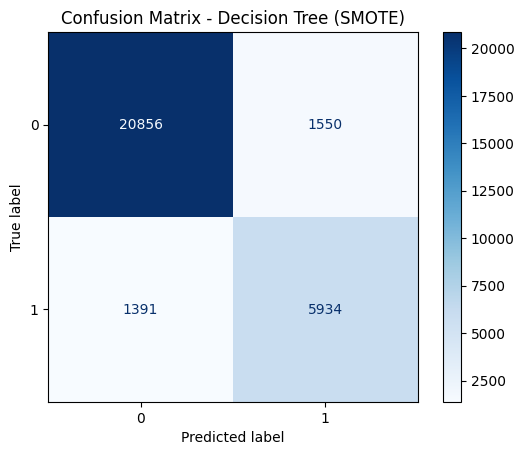

Decision Tree (SMOTE) Metrics:
Accuracy: 0.9011
Precision: 0.7929
Recall: 0.8101
F1 Score: 0.8014
ROC-AUC Score: 0.8705


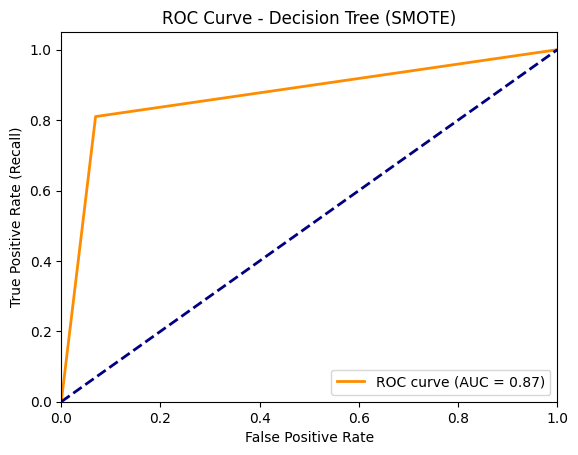

Decision Tree (SMOTE) ROC-AUC Score: 0.87


In [4]:
model, y_pred, y_probs = train_decision_tree(X_train, y_train, X_test, y_test, handle_imbalance=None)

model, y_pred, y_probs = train_decision_tree(X_train, y_train, X_test, y_test, handle_imbalance='balanced')

model, y_pred, y_probs = train_decision_tree(X_train, y_train, X_test, y_test, handle_imbalance='smote')
